<a href="https://colab.research.google.com/github/justlikethatHwan/Python/blob/main/240122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os, sys
from google.colab import drive
drive.mount('/content/drive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/dataset/.kaggle"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
# 로지스틱 회귀 모델과 인공신경망 이용해서 분류문제 해결
from tensorflow import keras
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [98]:
train_input.shape

(60000, 28, 28)

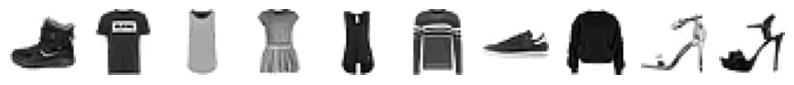

In [99]:
fig, axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [100]:
# 0 : 티셔츠
# 1 : 바지
# 2 : 스웨터
# 3 : 드레스
# 4 : 코트
# 5 : 샌달
# 6 : 셔츠
# 7 : 스니커즈
# 8 : 가방
# 9 : 앵글부츠

In [101]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [102]:
train_scaled = train_input / 255.0 # 0~1사이 값으로 변환
train_scaled = train_scaled.reshape(-1,28*28) # 벡터로 변환

In [103]:
train_scaled.shape

(60000, 784)

In [104]:
# random_state=42
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, random_state=42)

In [105]:
train_scaled.shape

(45000, 784)

In [106]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784, ))

In [107]:
model = keras.Sequential(dense)

In [108]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')

In [109]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6170 - accuracy: 0.7911
Epoch 2/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4786 - accuracy: 0.8385
Epoch 3/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.4538 - accuracy: 0.8452
Epoch 4/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4406 - accuracy: 0.8505
Epoch 5/5
1407/1407 [==============================] - 5s 4ms/step - loss: 0.4321 - accuracy: 0.8536


In [110]:
model.evaluate(val_scaled, val_target) # 테스트

469/469 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.8517


[0.43801406025886536, 0.8517333269119263]

In [111]:
# dataset/ x_gray.npy y.npy
npy_data = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/x_gray.npy')
y_data = np.load('/content/drive/MyDrive/Colab Notebooks/dataset/y.npy')

In [112]:
dogcat_2d = npy_data.reshape(-1,64*64) / 255

In [113]:
dogcat_2d.shape

(1000, 4096)

In [114]:
dogcat_2d[0]

array([0.96470588, 0.98823529, 0.97647059, ..., 0.48627451, 0.4745098 ,
       0.44705882])

In [115]:
train_val_input, test_input, train_val_target, test_target = train_test_split(dogcat_2d, y_data,random_state=42) # 원 데이터로부터

In [116]:
train_input, val_input, train_target, val_target = train_test_split(train_val_input, train_val_target,random_state=42) # 트레인 데이터로부

In [117]:
train_input.shape

(562, 4096)

In [118]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(4096, )) # input_shape 에 들어갈 값?
model = keras.Sequential(dense)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_input, train_target, epochs=5)

Epoch 1/5
18/18 [==============================] - 1s 10ms/step - loss: 1.4841 - accuracy: 0.4520
Epoch 2/5
18/18 [==============================] - 0s 9ms/step - loss: 1.0563 - accuracy: 0.5000
Epoch 3/5
18/18 [==============================] - 0s 9ms/step - loss: 1.1470 - accuracy: 0.5018
Epoch 4/5
18/18 [==============================] - 0s 6ms/step - loss: 1.0798 - accuracy: 0.4982
Epoch 5/5
18/18 [==============================] - 0s 6ms/step - loss: 1.0208 - accuracy: 0.5231


In [119]:
model.evaluate(val_input, val_target)

6/6 [==============================] - 0s 7ms/step - loss: 1.8838 - accuracy: 0.4734


[1.8837890625, 0.47340425848960876]

In [120]:
model.evaluate(test_input,test_target)

8/8 [==============================] - 0s 5ms/step - loss: 1.8345 - accuracy: 0.4880


[1.8344950675964355, 0.4880000054836273]

In [121]:
# 심층 신경망 분류 문제 해결
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [122]:
train_scaled = train_input / 255
train_scaled = train_scaled.reshape(-1,28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, random_state=42)

In [123]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784, ))
dense2 = keras.layers.Dense(10, activation='softmax')
model = keras.Sequential([dense1, dense2])

In [124]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 100)               78500     
                                                                 
 dense_28 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [125]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,),name='hidden'),
    keras.layers.Dense(10, activation='softmax',name='output')
], name='mnist model')

In [126]:
model.summary()

Model: "mnist model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [128]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 100)               78500     
                                                                 
 dense_30 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [129]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5785 - accuracy: 0.8047
Epoch 2/5
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4163 - accuracy: 0.8505
Epoch 3/5
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3801 - accuracy: 0.8617
Epoch 4/5
1407/1407 [==============================] - 6s 5ms/step - loss: 0.3563 - accuracy: 0.8711
Epoch 5/5
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3384 - accuracy: 0.8772


In [130]:
# Flatten layer
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [131]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255

In [132]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,random_state=42)

In [133]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1407/1407 [==============================] - 4s 2ms/step - loss: 0.5347 - accuracy: 0.8111
Epoch 2/5
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3950 - accuracy: 0.8587
Epoch 3/5
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3536 - accuracy: 0.8719
Epoch 4/5
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3330 - accuracy: 0.8813
Epoch 5/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3188 - accuracy: 0.8847


In [134]:
model.evaluate(val_scaled, val_target)

469/469 [==============================] - 1s 2ms/step - loss: 0.4518 - accuracy: 0.8503


[0.4518187642097473, 0.8503333330154419]

In [135]:
# 옵티마이저
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1407/1407 [==============================] - 9s 6ms/step - loss: 0.5314 - accuracy: 0.8134
Epoch 2/5
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3984 - accuracy: 0.8563
Epoch 3/5
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3575 - accuracy: 0.8706
Epoch 4/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3324 - accuracy: 0.8780
Epoch 5/5
1407/1407 [==============================] - 8s 5ms/step - loss: 0.3106 - accuracy: 0.8855


In [136]:
model.evaluate(val_scaled, val_target)

469/469 [==============================] - 3s 5ms/step - loss: 0.3458 - accuracy: 0.8755


[0.34582552313804626, 0.8754666447639465]

In [137]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [138]:
train_scaled = train_input / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,random_state=42)

In [139]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(1100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [140]:
model = model_fn()
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 1100)              863500    
                                                                 
 dense_36 (Dense)            (None, 10)                11010     
                                                                 
Total params: 874510 (3.34 MB)
Trainable params: 874510 (3.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [143]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [144]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

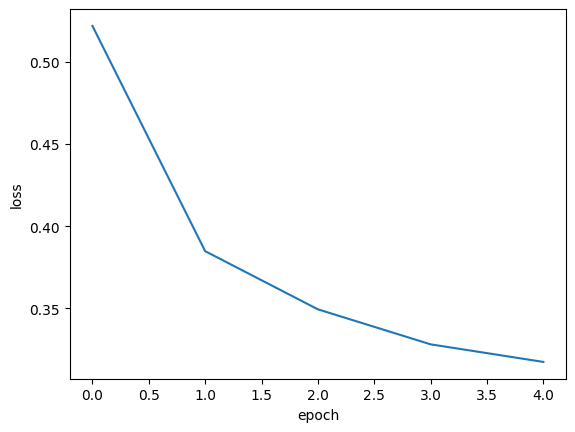

In [145]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [146]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

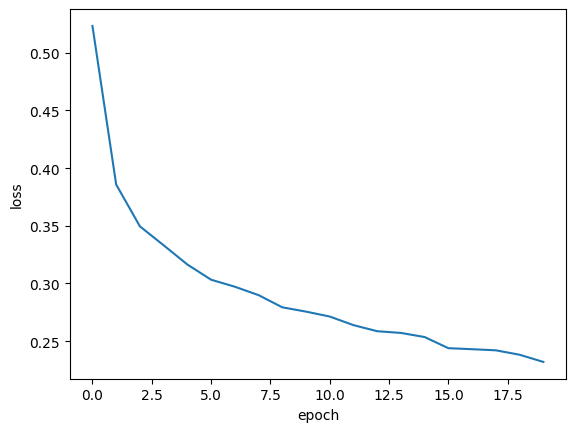

In [149]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [150]:
model = model_fn(keras.layers.Dropout(0,3))

In [152]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled, train_target,epochs=20, verbose=0, validation_data=(val_scaled,val_target))

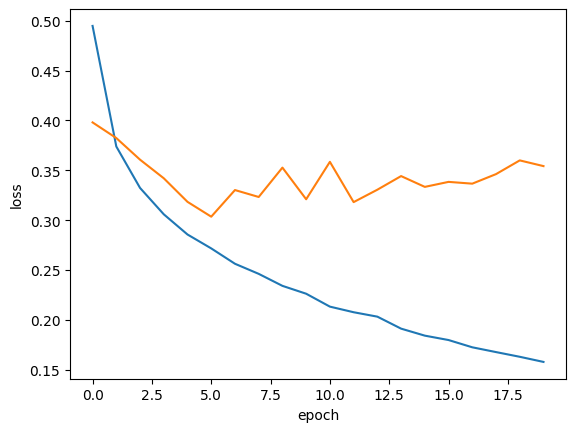

In [153]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [154]:
model.save_weights('model-weights.h5')

In [155]:
model.save('model-whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [156]:
!ls

drive  model-weights.h5  model-whole.h5  sample_data


In [157]:
model= model_fn(keras.layers.Dropout(0,3))

In [158]:
model.load_weights('model-weights.h5')

In [159]:
model = keras.models.load_model('model-whole.h5')

In [160]:
model.evaluate(val_scaled, val_target)

469/469 [==============================] - 3s 5ms/step - loss: 0.3542 - accuracy: 0.8907


[0.3542286157608032, 0.890666663646698]